# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhnesortymskiy
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | ta`u
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | fort st. john
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | kingston
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | douvres-la-delivrande
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | whakatane
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | s

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [38]:
# Display sample data
# converting date to reflect the date
# converting and formatting the temperature into (F)
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit= "s")
city_data_df["Date"] = city_data_df["Date"].dt.date
city_data_df["Max Temp"] = city_data_df["Max Temp"].apply(lambda k: round(k - 273.15) * 9/5 + 32)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhnesortymskiy,62.4397,71.7603,41.0,80,100,6.22,RU,2024-06-06
1,shingu,33.7333,135.9833,69.8,76,97,2.35,JP,2024-06-06
2,ta`u,-14.2336,-169.5144,80.6,69,74,8.01,AS,2024-06-06
3,portland,45.5234,-122.6762,78.8,37,20,3.60,US,2024-06-06
4,bethel,41.3712,-73.4140,75.2,77,75,3.60,US,2024-06-06


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nizhnesortymskiy,62.4397,71.7603,41.0,80,100,6.22,RU,2024-06-06
1,shingu,33.7333,135.9833,69.8,76,97,2.35,JP,2024-06-06
2,ta`u,-14.2336,-169.5144,80.6,69,74,8.01,AS,2024-06-06
3,portland,45.5234,-122.6762,78.8,37,20,3.60,US,2024-06-06
4,bethel,41.3712,-73.4140,75.2,77,75,3.60,US,2024-06-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

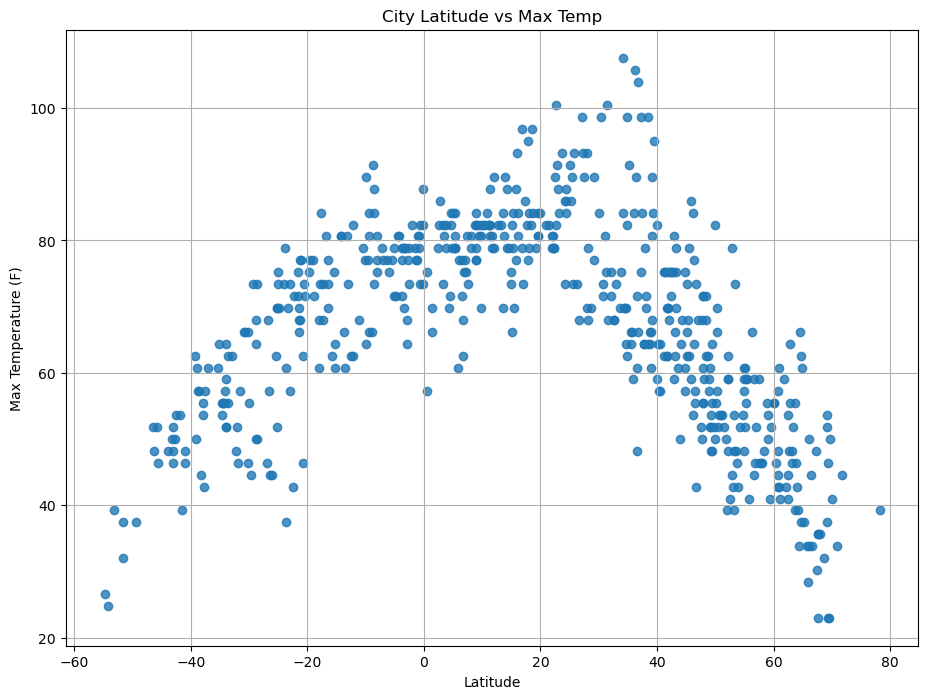

In [47]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

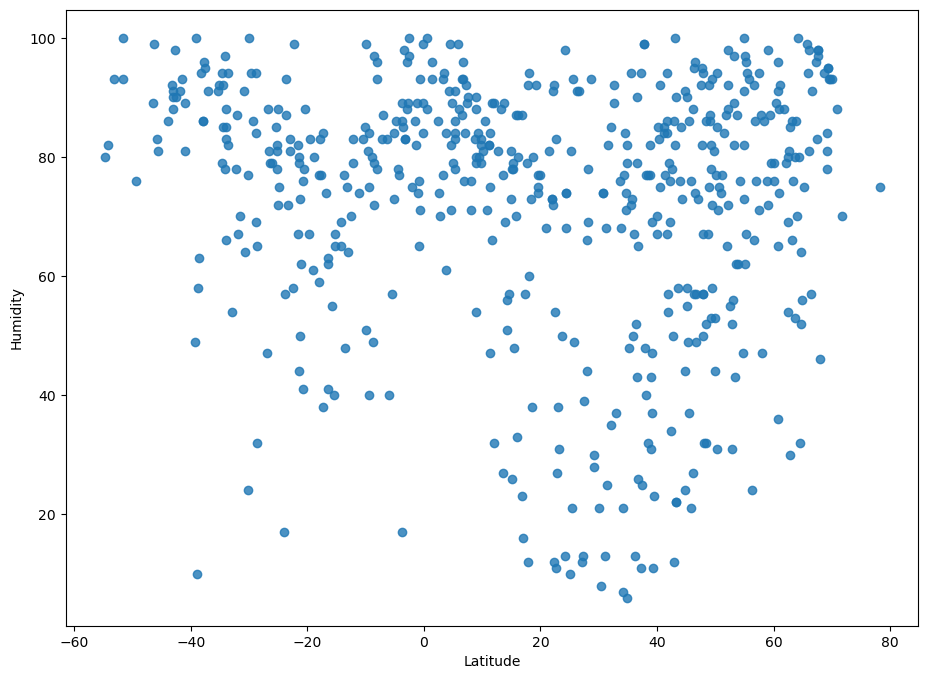

In [43]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE